In [1]:
import os

import tensorflow as tf
import sewar.full_ref
from tqdm import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt

import src.model
import src.utils
import src.vizualization

2022-12-21 18:26:58.723095: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-21 18:27:00.174963: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-21 18:27:02.323020: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/wojtek/anaconda3/lib/
2022-12-21 18:27:02.323684: W tensorflow/compiler/xla/stre

In [2]:
BASE_RESULT_PATH = os.path.join("images", "results")
BASE_TRAINER_PATH = os.path.join("images", "trainers")

style_image_path = os.path.join("images", "styles", "demo_picasso_music.jpg")
content_image_path = os.path.join("images", "contents", "demo_pablo_picasso.jpg")

style_image = src.utils.tf_utils.load_img(style_image_path)
content_image = src.utils.tf_utils.load_img(content_image_path)


In [3]:
trainers= []
trainers_num = 16

for _ in tqdm(range(trainers_num)):
    trainer = src.model.NSTImageTrainer.from_layers_selectors(
            style_image,
            content_image,
            src.utils.randomizers.random_length_choices,
            src.utils.randomizers.normal_choice,
            trainer_kw = dict(total_variation_weight=120),
            style_layers_selector_kw = dict(min_output_elements_num=2, rel_loc=0.05, rel_scale=0.25), 
            content_layers_selector_kw = dict(rel_loc=0.5, rel_scale=0.26)
        )
    trainer.compile(tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1))
    trainers.append(trainer)

  0%|          | 0/16 [00:00<?, ?it/s]2022-12-21 18:27:15.909752: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2022-12-21 18:27:23.883448: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-21 18:27:24.360142: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.91GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-12-21 18:27:24.360743: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.91GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-12-21 18:27:26.852437: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc

In [4]:
selectioner = src.model.TraintersSelectioner(trainers)

In [5]:

def plot_trainters():
    src.vizualization.plot_trained_images(selectioner.trainers)
    plt.show()

callbacks = [clear_output, plot_trainters]

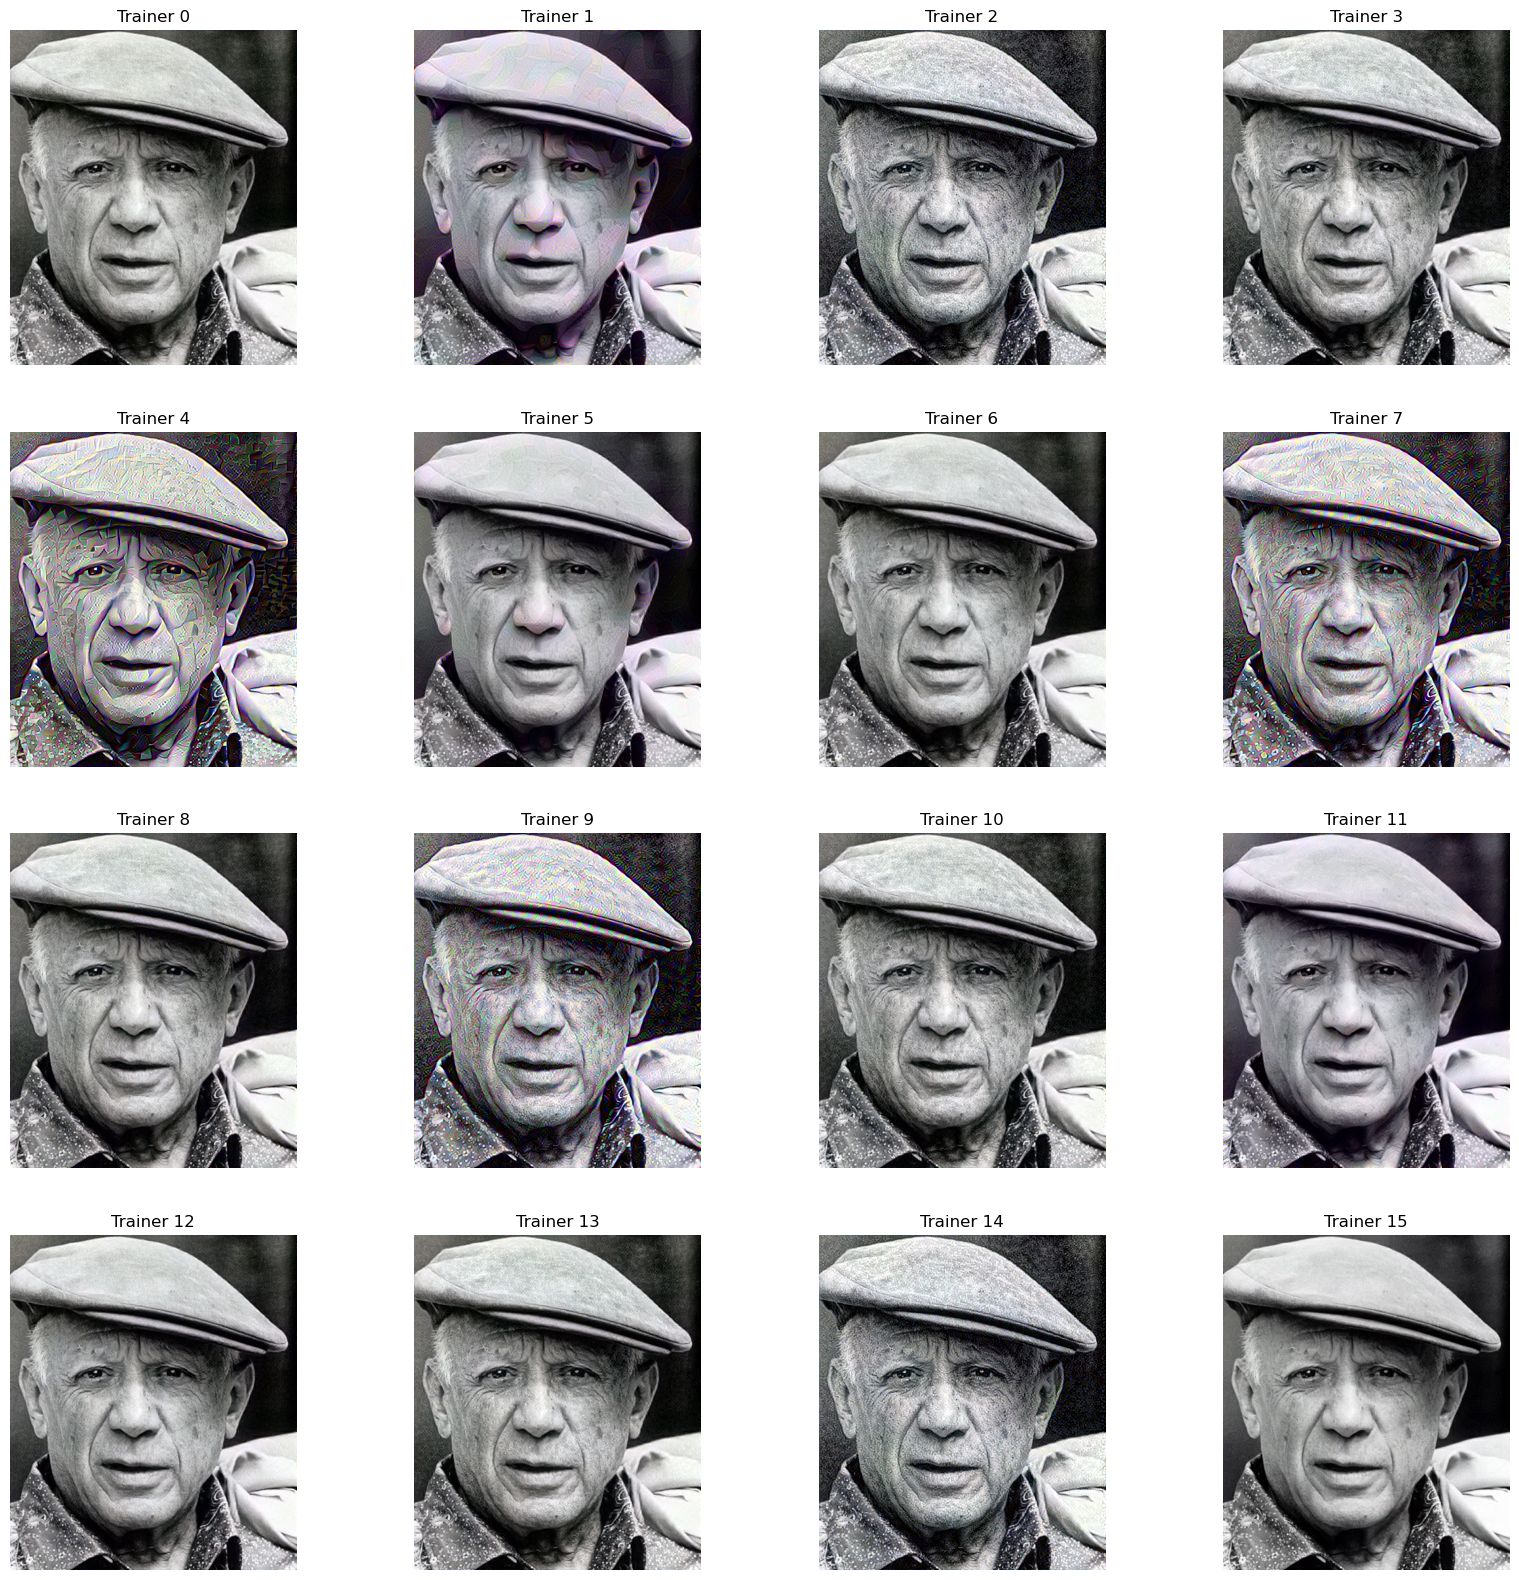

AttributeError: 'TraintersSelectioner' object has no attribute 'history'

In [6]:

selectioner.train(epochs=1, steps=30, callbacks=callbacks)
selectioner.save_history()
selectioner.sort_trainers_by_differences(sewar.full_ref.mse)
clear_output()
src.vizualization.plot_trained_images(selectioner.trainers)
selectioner.remove_second_half_trainers()



In [ ]:

selectioner.train(epochs=1, steps=30, callbacks=callbacks)
selectioner.save_history()
selectioner.sort_trainers_by_differences(sewar.full_ref.mse)
clear_output()
src.vizualization.plot_trained_images(selectioner.trainers)
selectioner.remove_second_half_trainers()



: 

In [ ]:
selectioner.train(epochs=1, steps=30, callbacks=callbacks)
selectioner.save_history()
selectioner.sort_trainers_by_differences(sewar.full_ref.mse)
clear_output()
src.vizualization.plot_trained_images(selectioner.trainers)


: 

: 

In [ ]:
assert False

: 

In [ ]:
def display_output_image():
    display(trainer.output_image) 
trainer_callbacks = [clear_output, display_output_image]

: 

In [ ]:
################ HISTORY TRAINING #######################

# trainer = selectioner.history[0][5]
# trainer.training_loop(30, 4, callbacks=trainer_callbacks)

# src.vizualization.save_vizualizations(
#     trainer,
#     style_image_path,
#     content_image_path,
#     BASE_RESULT_PATH,
#     BASE_TRAINER_PATH
# )


: 

In [ ]:
trainer = selectioner.trainers[2]
trainer.training_loop(epochs=4, steps_per_epoch=30, callbacks=trainer_callbacks)

: 

In [ ]:
src.vizualization.plot_trainer(selectioner.trainers[0])

: 

In [ ]:
src.vizualization.save_vizualizations(
    selectioner.trainers[3],
    style_image_path,
    content_image_path,
    BASE_RESULT_PATH,
    BASE_TRAINER_PATH
)


: 

### Models layers

In [ ]:
assert False

: 

: 

In [ ]:
src.vizualization.plot_trainer(selectioner.trainers[0])
selectioner.trainers[0].style_layers, selectioner.trainers[0].content_layers

: 

In [ ]:
# multi_trainer.trainers[0].output_image


: 

In [ ]:
src.vizualization.plot_trainer(selectioner.trainers[1])
selectioner.trainers[1].style_layers, selectioner.trainers[1].content_layers

: 

In [ ]:
src.vizualization.plot_trainer(selectioner.trainers[2])
selectioner.trainers[2].style_layers, selectioner.trainers[2].content_layers

: 

In [ ]:
src.vizualization.plot_trainer(selectioner.trainers[3])
selectioner.trainers[3].style_layers, selectioner.trainers[3].content_layers

: 

: 